## Challenge problem 2.4

#### Here drag force is also included and it can be observed that at angle 36 degrees the range is higher than the other angles but without drag force maximum range occures at 45 degrees

In [1]:
class particle2(object):
    
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt

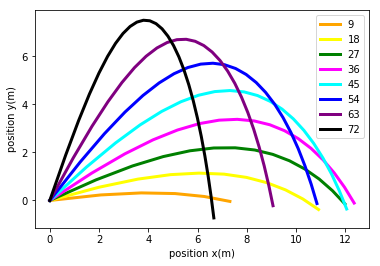

In [26]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ColorConverter as cc
import math

g = 9.8            # g acceleration
k = 0.1            # drag force constant
v0 = 30.           # initial velocity

dt = 0.1           # time step

range_array=[]     # Containes the maximum range for each angle
angle_array=[]

colors = ['red','orange','yellow','green','magenta','cyan','blue','purple','black']

for angle in range(1,9):
    x = [0]                                  # we need to initialize the arrays for each value of the angle
    y = [0]
    vx = [math.cos(angle*0.1*math.pi/2.)*v0] 
    vy = [math.sin(angle*0.1*math.pi/2.)*v0] 
    t = [0.]

    p = particle2(1., 0., 0., vx[0], vy[0])
    while p.y >= 0.:
        v = math.sqrt(p.vx**2 + p.vy**2) 
        fy = -g - k * v * p.vy 
        fx = - k * v * p.vx
        p.euler(fx, fy, dt)
        x.append(p.x)
        y.append(p.y)
        vx.append(p.vx)
        vy.append(p.vy)
        t.append(t[-1]+dt)
    
    t_data = np.array(t) # we convert the list into a numpy array for plotting
    x_data = np.array(x)
    y_data = np.array(y)
    vx_data = np.array(vx)
    vy_data = np.array(vy)
    
    range_array.append(x_data[-1])
    angle_array.append(angle*9)

    my_plot = pyplot.plot(x_data, y_data, color=(colors[angle]), ls='-', lw=3, label = angle*9)
    pyplot.legend()

pyplot.xlabel('position x(m)')
pyplot.ylabel('position y(m)');

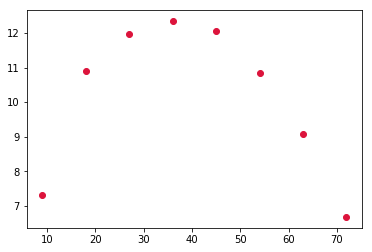

In [30]:
pyplot.scatter(angle_array,range_array, color ='#DC143C')